# Introduction

This notebook showcases my work on the *Financial Inclusion in Africa* starter project by Zindi. The workflow is organized into the following steps:

1. **Loading the datasets**: Importing and preparing the data for analysis.  
2. **Exploratory Data Analysis (EDA)**: Understanding the data through visualizations and statistical summaries.  
3. **Model Development**: Creating and fine-tuning predictive models.  
4. **Model Evaluation**: Assessing model performance using appropriate metrics.  
5. **Test Submission**: Preparing and submitting predictions for evaluation on Zindi's platform.  
6. **Additional Activities**: Exploring potential extensions, such as model deployment.

This structured approach ensures clarity and replicability throughout the project.

Per the rules, the dataset used in this exercise can only be accessed on the Zindi platfom [here](https://zindi.africa/competitions/financial-inclusion-in-africa/data)

# 1. Loading the datasets

In [34]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split

In [35]:
# Let us load the datasets
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [36]:
# Let us check the first five rows of the train dataset
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [37]:
# Lets us confirm the definitions of the features
definitions = pd.read_csv('VariableDefinitions.csv')
definitions

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


We can confirm that there are 12 independent features in the dataset. The **'bank_account'** column serves as the dependent variable, meaning its values are influenced by the 12 independent variables listed in the definitions file.

# 2. Exploratory Data Analysis

Here, let us try to explore each column in the **train** dataset. We will first start by carrying out some descriptive analysis on the train and test dataset.

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


The **train** dataset contains no null values in each of its 13 feature columns. Most of the independent variables (10/12) are of the `object` data type, indicating they consist of non-numeric characters. Similarly, the dependent variable is also of type `object`, as its values are categorical ("Yes" or "No"). These can later be processed using a `LabelEncoder` to convert the dependent variable into binary values (1 for "Yes" and 0 for "No") so they can be used during model training.

In [39]:
# Check if all rows in the train dataset are unique
are_rows_unique = train.duplicated().sum() == 0

if are_rows_unique:
    print("All rows in the dataset are unique.")
else:
    print(f"There are {train.duplicated().sum()} duplicate rows in the dataset.")


All rows in the dataset are unique.


In [40]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10086 entries, 0 to 10085
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 10086 non-null  object
 1   year                    10086 non-null  int64 
 2   uniqueid                10086 non-null  object
 3   location_type           10086 non-null  object
 4   cellphone_access        10086 non-null  object
 5   household_size          10086 non-null  int64 
 6   age_of_respondent       10086 non-null  int64 
 7   gender_of_respondent    10086 non-null  object
 8   relationship_with_head  10086 non-null  object
 9   marital_status          10086 non-null  object
 10  education_level         10086 non-null  object
 11  job_type                10086 non-null  object
dtypes: int64(3), object(9)
memory usage: 945.7+ KB


Unlike the **train** dataset, the **test** dataset only has 12 columns. The `bank_account` column is missing since that is what we are supposed to submit for evaluation by Zindi once we have created a model.

## a. `country` column

In [41]:
train['country'].describe()

count      23524
unique         4
top       Rwanda
freq        8735
Name: country, dtype: object

The country column has 23,524 rows of data and 4 unique values with the modal value being Rwanda that appears 8,735 times.

In [42]:
# Finding out unique values in the country column
train['country'].unique()

array(['Kenya', 'Rwanda', 'Tanzania', 'Uganda'], dtype=object)

This dataset stems from the above East African countries. Let us confirm the distribution of these countries in the dataset

In [43]:
# Checking distribution of unique values in the country column
train['country'].value_counts()

country
Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: count, dtype: int64

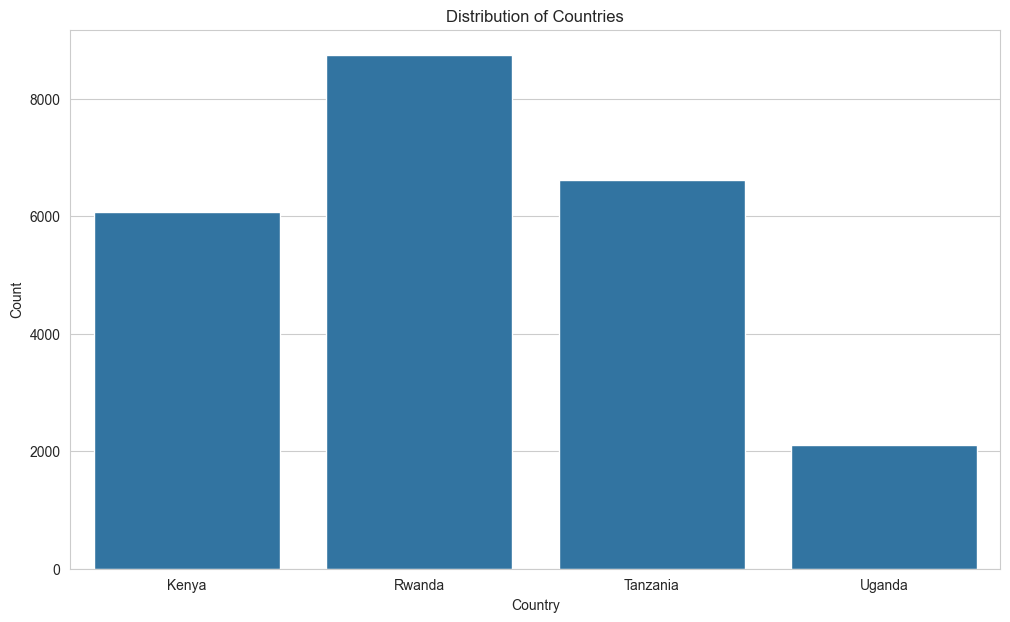

In [44]:
# Visualizing the distribution of the country column
plt.figure(figsize=(12, 7))
sns.countplot(x='country', data=train)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of Countries')
plt.show()

The **train** dataset's country distribution is relatively balanced, except for Uganda, which has only 2,101 records. This imbalance could lead to model bias, potentially resulting in more accurate predictions for Rwandese nationals compared to Ugandan nationals. We can deal with this by using techniques such as SMOTE or SMOTETomek. The latter is preferrable as it does away with the Tomek Links ensuring there are no overlapping regions between the majority and minority classes. We will however employ this later on after the EDA.

Let us confirm whether there is any relationship between the country and whether or not someone has a bank account.

In [45]:
# Checking for any relationship between the country and the target variable
# Create a contingency table
contingency_table = pd.crosstab(train['country'], train['bank_account'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("Chi-Squared Test Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)

if p < 0.05:
    print("There is a significant relationship between 'country' and 'bank_account' (p < 0.05).")
else:
    print("There is no significant relationship between 'country' and 'bank_account' (p ≥ 0.05).")

Chi-Squared Test Statistic: 837.961907796301
p-value: 2.5290257400600255e-181
Degrees of Freedom: 3
There is a significant relationship between 'country' and 'bank_account' (p < 0.05).


In [46]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


## b. `year` column

In [47]:
train['year'].describe()

count    23524.000000
mean      2016.975939
std          0.847371
min       2016.000000
25%       2016.000000
50%       2017.000000
75%       2018.000000
max       2018.000000
Name: year, dtype: float64

The training dataset contains data spanning the years 2016 to 2018. Since the year is included as one of the features, it likely plays a significant role in predicting whether someone has a bank account. Given the positive financial growth in these countries during this period, it is reasonable to hypothesize that the number of people with bank accounts from the dataset may have increased over the years. This hypothesis can be tested to validate the assumption.

<Figure size 1200x700 with 0 Axes>

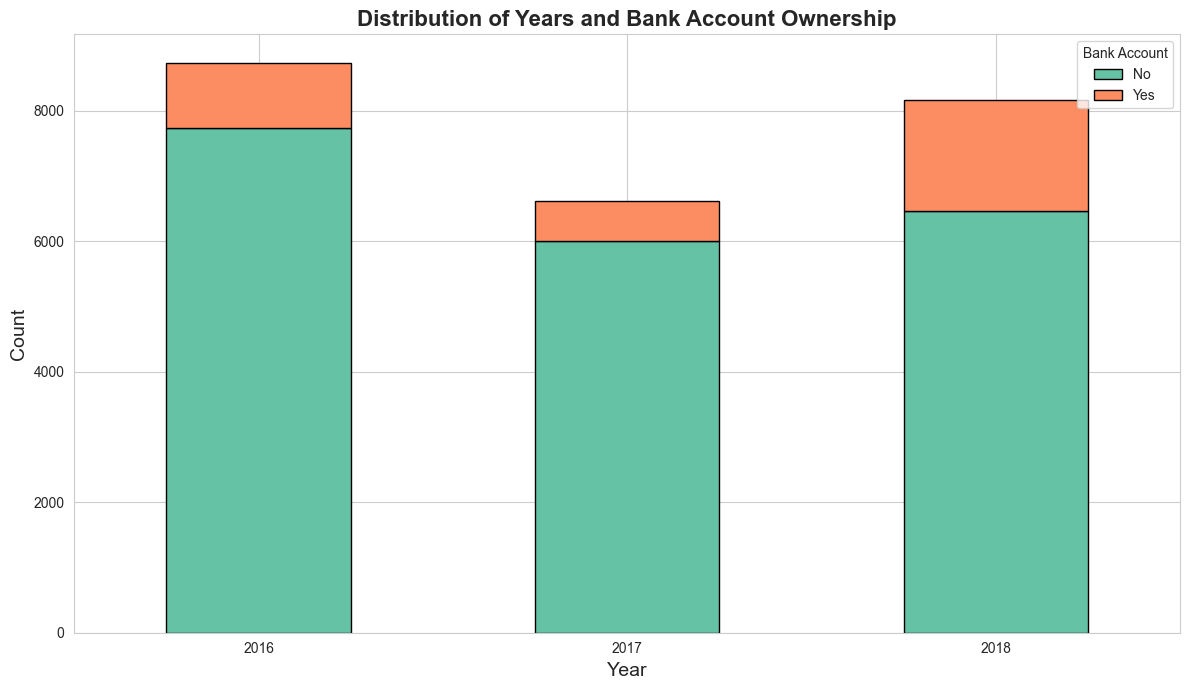

In [48]:
# Preparing the data for the stacked bar chart
year_bank_account = train.groupby(['year', 'bank_account']).size().unstack(fill_value=0)

# Creating the stacked bar chart
plt.figure(figsize=(12, 7))
year_bank_account.plot(
    kind='bar', 
    stacked=True, 
    color=['#66c2a5', '#fc8d62'],  # Custom colors for better visuals
    edgecolor='black',  # Add edges for clarity
    figsize=(12, 7)
)

# Adding labels and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Years and Bank Account Ownership', fontsize=16, fontweight='bold')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title='Bank Account', labels=['No', 'Yes'], loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()

The years are almost evenly distributed

In [49]:
# Checking for any relationship between the year and the target variable
# Create a contingency table
contingency_table = pd.crosstab(train['year'], train['bank_account'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("Chi-Squared Test Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)

if p < 0.05:
    print("There is a significant relationship between 'year' and 'bank_account' (p < 0.05).")
else:
    print("There is no significant relationship between 'year' and 'bank_account' (p ≥ 0.05).")

Chi-Squared Test Statistic: 488.8145974683432
p-value: 7.165703314454751e-107
Degrees of Freedom: 2
There is a significant relationship between 'year' and 'bank_account' (p < 0.05).


# c. `uniqueid` column- Drop

In [50]:
# Drop the 'uniqueid' column
train = train.drop(columns=['uniqueid'])

# Verify the column has been dropped
print(train.head())

  country  year bank_account location_type cellphone_access  household_size  \
0   Kenya  2018          Yes         Rural              Yes               3   
1   Kenya  2018           No         Rural               No               5   
2   Kenya  2018          Yes         Urban              Yes               5   
3   Kenya  2018           No         Rural              Yes               5   
4   Kenya  2018           No         Urban               No               8   

   age_of_respondent gender_of_respondent relationship_with_head  \
0                 24               Female                 Spouse   
1                 70               Female      Head of Household   
2                 26                 Male         Other relative   
3                 34               Female      Head of Household   
4                 26                 Male                  Child   

            marital_status                  education_level  \
0  Married/Living together              Secondary edu

## d. `location_type` column

In [51]:
train['location_type'].describe()

count     23524
unique        2
top       Rural
freq      14343
Name: location_type, dtype: object

The `location_type` column contains no null values and consists of two categories: `rural` and `urban`, with the majority of entries representing `rural` areas.

In [52]:
# Checking distribution of unique values in the location_type column
train['location_type'].value_counts()

location_type
Rural    14343
Urban     9181
Name: count, dtype: int64

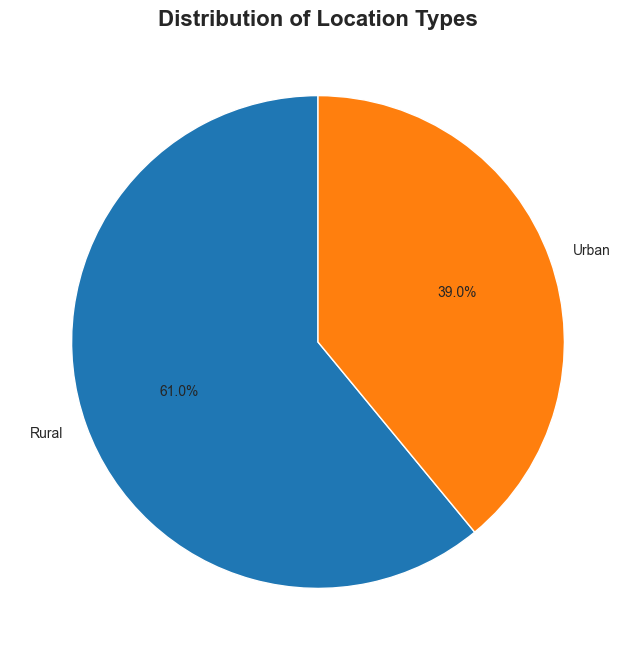

In [53]:
# Visualizing the distribution of the location_type column
plt.figure(figsize=(8, 8))

# Calculating value counts for the location_type column
location_counts = train['location_type'].value_counts()

# Creating the pie chart
plt.pie(
    location_counts, 
    labels=location_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['#1f77b4', '#ff7f0e']  # Optional: Custom colors
)

# Adding a title
plt.title('Distribution of Location Types', fontsize=16, fontweight='bold')

# Displaying the plot
plt.show()

The dataset exhibits a noticeable imbalance, with over 5,000 more data points representing `Rural` locations compared to `Urban` locations, indicating a bias toward rural areas. As noted earlier, we will have to employ techniques such as SMOTETomek to ensure our dataset is balanced.

In [54]:
# Checking for any relationship between the location_type and the target variable
# Create a contingency table
contingency_table = pd.crosstab(train['location_type'], train['bank_account'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("Chi-Squared Test Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)

if p < 0.05:
    print("There is a significant relationship between 'location_type' and 'bank_account' (p < 0.05).")
else:
    print("There is no significant relationship between 'location_type' and 'bank_account' (p ≥ 0.05).")

Chi-Squared Test Statistic: 178.72103113792548
p-value: 9.218844615938627e-41
Degrees of Freedom: 1
There is a significant relationship between 'location_type' and 'bank_account' (p < 0.05).


## e. `cellphone_access` column

In [55]:
train['cellphone_access'].describe()

count     23524
unique        2
top         Yes
freq      17454
Name: cellphone_access, dtype: object

The `cellphone_access` column contains no null values and consists of two categories: `Yes` and `No`, with the majority of entries being `Yes`.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17124\2974118487.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


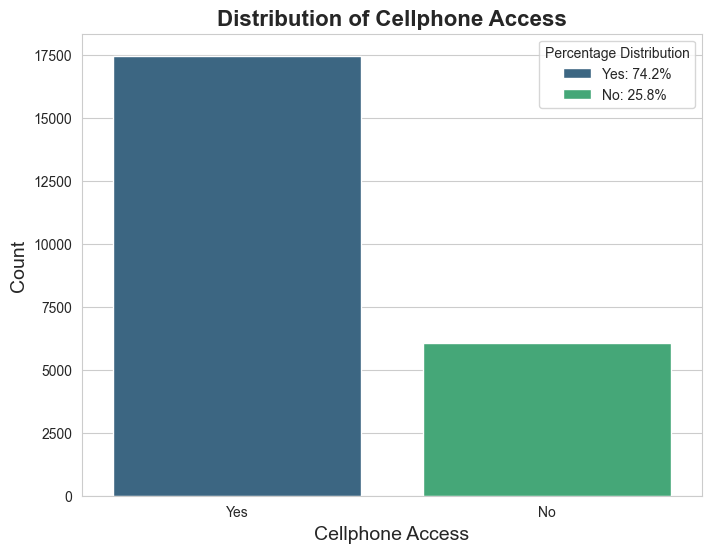

In [56]:
# Calculate percentage distribution
value_counts = train['cellphone_access'].value_counts()
percentages = (value_counts / value_counts.sum()) * 100

# Visualizing the distribution of values in the 'cellphone_access' column
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')

# Creating the countplot
sns.countplot(
    x='cellphone_access', 
    data=train, 
    palette='viridis'
)

# Adding labels and title
plt.xlabel('Cellphone Access', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Cellphone Access', fontsize=16, fontweight='bold')

# Adding a legend with percentage distribution
legend_labels = [f'{label}: {percent:.1f}%' for label, percent in zip(value_counts.index, percentages)]
plt.legend(legend_labels, title='Percentage Distribution', loc='upper right')

# Display the plot
plt.show()

The percentage of users with cellphones is nearly three times higher than those without, indicating a significant imbalance. This could introduce bias into the model, which will need to be addressed as discussed earlier.

In [57]:
# Checking for any relationship between the cellphone_access and the target variable
# Create a contingency table
contingency_table = pd.crosstab(train['cellphone_access'], train['bank_account'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("Chi-Squared Test Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)

if p < 0.05:
    print("There is a significant relationship between 'cellphone_access' and 'bank_account' (p < 0.05).")
else:
    print("There is no significant relationship between 'cellphone_access' and 'bank_account' (p ≥ 0.05).")

Chi-Squared Test Statistic: 1032.7610839461552
p-value: 1.3592541989722424e-226
Degrees of Freedom: 1
There is a significant relationship between 'cellphone_access' and 'bank_account' (p < 0.05).


In [58]:
train.head()

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


## f. `household_size` column

In [62]:
train['household_size'].describe()

count    23524.000000
mean         3.797483
std          2.227613
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         21.000000
Name: household_size, dtype: float64

Number of household members of interviewees ranges between 1-21 with most families ranging between 2-5 household members

In [63]:
# Checking distribution of unique values in the household_size column
train['household_size'].value_counts()

household_size
2     5229
3     3920
4     3474
1     3057
5     2853
6     2096
7     1400
8      751
9      363
10     190
11      69
12      68
13      25
15      11
14      10
16       4
21       1
18       1
17       1
20       1
Name: count, dtype: int64

In [64]:
print(train['household_size'].value_counts())
print(train['household_size'].value_counts().get(1, 0))  # Get count of '1'
print(train['household_size'].value_counts().get(21, 0))  # Get count of '21'

household_size
2     5229
3     3920
4     3474
1     3057
5     2853
6     2096
7     1400
8      751
9      363
10     190
11      69
12      68
13      25
15      11
14      10
16       4
21       1
18       1
17       1
20       1
Name: count, dtype: int64
3057
1


<Axes: xlabel='household_size', ylabel='Count'>

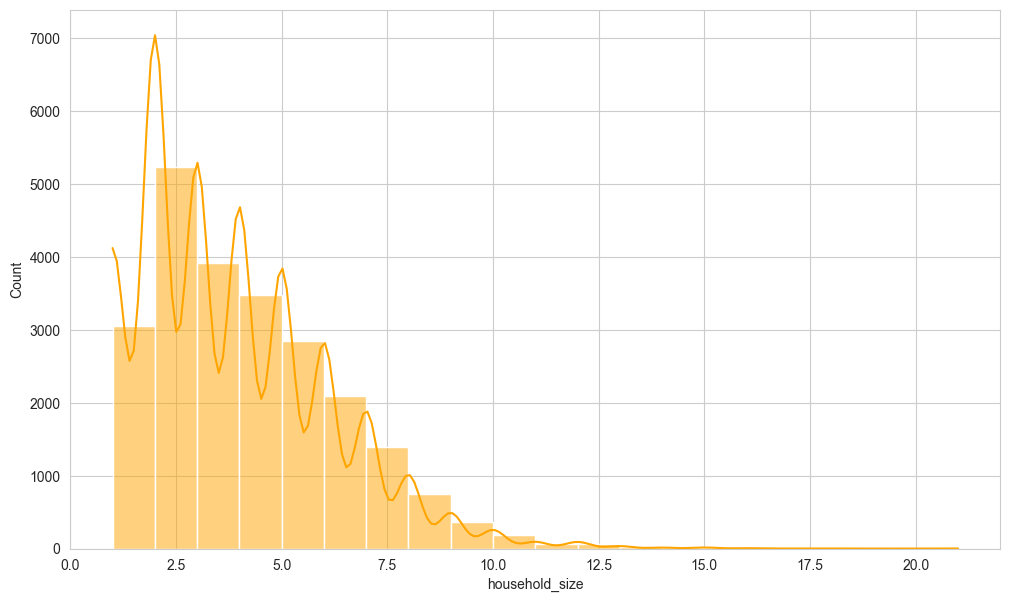

In [60]:
# Vizualizing the distribution of household sizes using a histogram
plt.figure(figsize=(12, 7))
sns.histplot(train['household_size'], bins=20, kde=True, color='orange')

It is clear that we have outliers in this column. Some of the ways we can deal with these outliers include:
1. Remove the outliers
2. Transfom the data using Log Transformations, square root or cube root transformation or clipping
3. Imputation- replacing with the mean, mode or median values. etc